In [1]:
# Подключим библиотеку edgeR
# Она дополнительно подключает библиотеку limma
library(edgeR)

Loading required package: limma



In [2]:
# Считаем наши данные
counts <- read.delim("../data/all_counts.txt", row.names = 1)
head(counts)

,C61,C62,C63,C64,C91,C92,C93,C94,I561,I562,⋯,I593,I594,I861,I862,I863,I864,I891,I892,I893,I894
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G01010,289,317,225,343,325,449,310,299,563,438,⋯,567,421,130,411,382,190,501,390,480,407
AT1G01020,127,78,142,130,156,146,144,95,138,129,⋯,127,154,35,132,97,46,139,175,137,123
AT1G03987,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT1G01030,17,25,32,24,22,25,21,35,18,6,⋯,14,21,37,16,19,38,24,18,37,23
AT1G01040,605,415,506,565,762,854,658,753,704,692,⋯,733,614,297,521,542,381,651,573,650,550
AT1G03993,1,1,0,0,0,0,1,1,3,0,⋯,0,0,0,1,0,1,3,1,1,1


In [3]:
d0 <- DGEList(counts)

In [4]:
head(d0)

An object of class "DGEList"
$counts
          C61 C62 C63 C64 C91 C92 C93 C94 I561 I562 I563 I564 I591 I592 I593
AT1G01010 289 317 225 343 325 449 310 299  563  438  380  407  678  386  567
AT1G01020 127  78 142 130 156 146 144  95  138  129   99  118  154  140  127
AT1G03987   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0
AT1G01030  17  25  32  24  22  25  21  35   18    6   46   33   19    8   14
AT1G01040 605 415 506 565 762 854 658 753  704  692  641  601  704  508  733
AT1G03993   1   1   0   0   0   0   1   1    3    0    1    1    1    0    0
          I594 I861 I862 I863 I864 I891 I892 I893 I894
AT1G01010  421  130  411  382  190  501  390  480  407
AT1G01020  154   35  132   97   46  139  175  137  123
AT1G03987    0    0    0    0    0    0    0    0    0
AT1G01030   21   37   16   19   38   24   18   37   23
AT1G01040  614  297  521  542  381  651  573  650  550
AT1G03993    0    0    1    0    1    3    1    1    1

$samples
    group lib.size norm.factors
C61     1 10502901            1
C62     1  9423745            1
C63     1  9437115            1
C64     1 10415490            1
C91     1 10169158            1
19 more rows ...

In [5]:
# Подсчитаем факторы нормализации
d0 <- calcNormFactors(d0)
d0

,C61,C62,C63,C64,C91,C92,C93,C94,I561,I562,⋯,I593,I594,I861,I862,I863,I864,I891,I892,I893,I894
AT1G01010,289,317,225,343,325,449,310,299,563,438,⋯,567,421,130,411,382,190,501,390,480,407
AT1G01020,127,78,142,130,156,146,144,95,138,129,⋯,127,154,35,132,97,46,139,175,137,123
AT1G03987,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT1G01030,17,25,32,24,22,25,21,35,18,6,⋯,14,21,37,16,19,38,24,18,37,23
AT1G01040,605,415,506,565,762,854,658,753,704,692,⋯,733,614,297,521,542,381,651,573,650,550
AT1G03993,1,1,0,0,0,0,1,1,3,0,⋯,0,0,0,1,0,1,3,1,1,1
AT1G01046,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSRNA049757489,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT1G01050,1164,876,935,979,1146,1254,948,791,1036,1212,⋯,1184,1287,350,1152,870,569,1173,1293,1045,1009
AT1G03997,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# Отсечем гены, которые слабо экспрессируются
# CPM (Count per millions) - кол-во чтений на миллион
cutoff <- 1 # Порог отсечения
drop <- which(apply(cpm(d0), 1, max) < cutoff) 
d <- d0[-drop,] 
dim(d) # number of genes left

[1] 21080    24

In [7]:
snames <- colnames(counts) # Sample names
snames

[1] "C61"  "C62"  "C63"  "C64"  "C91"  "C92"  "C93"  "C94"  "I561" "I562"
[11] "I563" "I564" "I591" "I592" "I593" "I594" "I861" "I862" "I863" "I864"
[21] "I891" "I892" "I893" "I894"

In [8]:
cultivar <- substr(snames, 1, nchar(snames) - 2) 
time <- substr(snames, nchar(snames) - 1, nchar(snames) - 1)
cultivar

[1] "C"  "C"  "C"  "C"  "C"  "C"  "C"  "C"  "I5" "I5" "I5" "I5" "I5" "I5" "I5"
[16] "I5" "I8" "I8" "I8" "I8" "I8" "I8" "I8" "I8"

In [9]:
time

[1] "6" "6" "6" "6" "9" "9" "9" "9" "6" "6" "6" "6" "9" "9" "9" "9" "6" "6" "6"
[20] "6" "9" "9" "9" "9"

In [10]:
# Выделим группу, то есть сделаем разметку
group <- interaction(cultivar, time)
group

[1] C.6  C.6  C.6  C.6  C.9  C.9  C.9  C.9  I5.6 I5.6 I5.6 I5.6 I5.9 I5.9 I5.9
[16] I5.9 I8.6 I8.6 I8.6 I8.6 I8.9 I8.9 I8.9 I8.9
Levels: C.6 I5.6 I8.6 C.9 I5.9 I8.9

In [11]:
mm <- model.matrix(~0 + group)
head(mm)

,groupC.6,groupI5.6,groupI8.6,groupC.9,groupI5.9,groupI8.9
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0


Как voom работает?
* Значения преобразуются в логарифмированный CPM (Counts per million)
* Линейная модель обучается на этих значениях
* Кривая обучается на средней эксрпесии (обозначена красным) предскахывать sqrt(отклонения)
* Потом используются веса для каждого гена,полученные из линейной модели

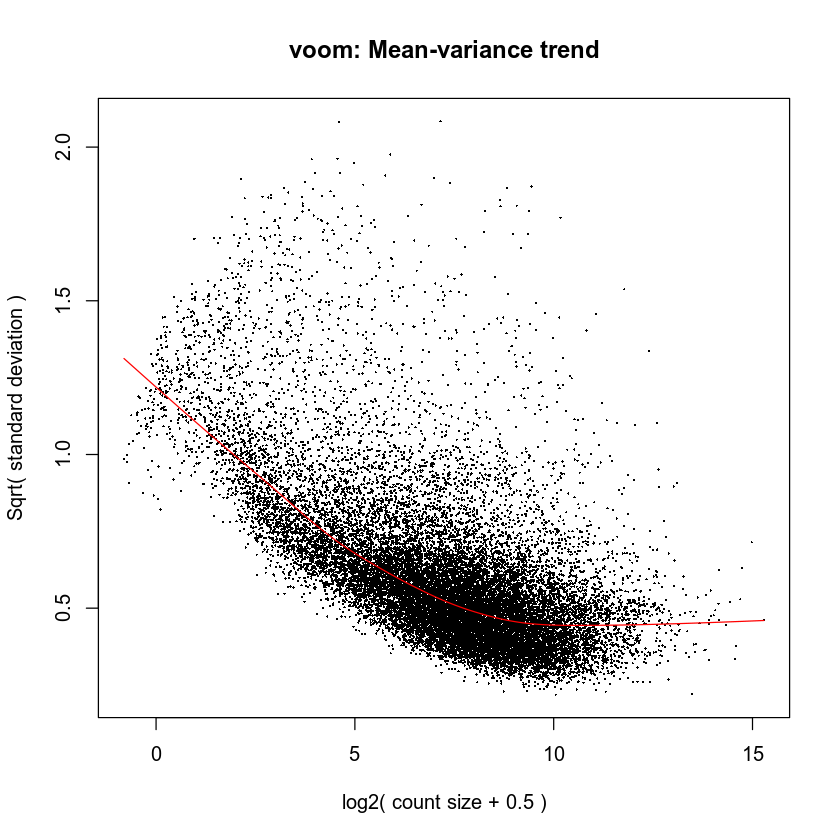

In [12]:
# используем voom нормализаци.
y <- voom(d, mm, plot = T)

In [13]:
# Обучим линейную модель
fit <- lmFit(y, mm)
head(coef(fit))

,groupC.6,groupI5.6,groupI8.6,groupC.9,groupI5.9,groupI8.9
AT1G01010,4.837410,5.3738532,5.065354,5.043214,5.5240004,5.363809
AT1G01020,3.530869,3.4993460,3.212860,3.689622,3.7209961,3.736297
AT1G01030,1.250817,0.9293832,1.559242,1.285596,0.4831707,1.215591
AT1G01040,5.676015,5.9469878,5.778889,6.182374,5.8641107,5.815498
AT1G01050,6.598712,6.5013631,6.463936,6.619239,6.7532886,6.711772
AT1G01060,7.807988,7.4624783,7.390741,8.966047,8.2706387,8.376129


In [14]:
# Обозначим группы для сравнения
contr <- makeContrasts(groupI5.9 - groupI5.6, levels = colnames(coef(fit)))
contr

,groupI5.9 - groupI5.6
groupC.6,0
groupI5.6,-1
groupI8.6,0
groupC.9,0
groupI5.9,1
groupI8.9,0


In [15]:
# обучим сравнения
tmp <- contrasts.fit(fit, contr)

In [16]:
# Применим эмпирический Байес (он сглаживает среднии оклоения к общему среднему отклонению)
# В общем считаем t-statistic
tmp <- eBayes(tmp)

In [17]:
top.table <- topTable(tmp, sort.by = "P", n = Inf)
head(top.table, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT5G37260,3.0480867,6.964609,24.154998,1.193341e-16,2.515563e-12,26.622628
AT3G02990,1.6484885,3.304597,13.605334,8.573977e-12,9.036971e-08,16.006216
AT2G29500,-5.0342224,5.525802,-12.062120,7.937586e-11,5.577477e-07,14.645646
AT3G24520,1.8715741,5.882965,11.710003,1.360008e-10,7.167244e-07,14.385545
AT3G46230,-6.7068648,4.544494,-11.189910,3.081581e-10,1.299195e-06,12.519533
AT5G65630,1.0468903,7.553775,10.657591,7.329270e-10,2.575017e-06,12.802559
AT3G24100,-1.2759156,5.988295,-10.237187,1.485118e-09,4.021633e-06,12.109394
AT1G53540,-7.1847583,4.316965,-10.160183,1.693866e-09,4.021633e-06,10.864734
AT4G21320,-2.8641453,4.705136,-10.152258,1.717016e-09,4.021633e-06,11.825499


* **logFC**: прологарифмированное отношение I5.9/I5.6
* **AveExpr**: Средняя экспресиия среди всех сэплов, in log2 CPM
* **t**: **logFC** деленный на стандартную ошибку
* **P.Value**: p-value, считаемый с помощью t-теста c нулевой гипотезой, что **logFC** != 0
* **adj.P.Val**: Benjamini-Hochberg false discovery rate adjusted p-value (p-value с поправкой на FDR Бенджамина Хохберга)
* **B**: (не очень полезная метрика)